In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import sens_helpers
import scalepy

In [2]:
def hist_y(y):
    return np.hstack([y[0], y])

def plot_sens_err(ax, e_bins, sens, sens_sd, color='b', label=''):
    ax.step(e_bins, hist_y(sens), sens_sd, label=label, color=color)
    midpoints = (e_bins[:-1] + e_bins[1:])/2
    ax.errorbar(midpoints, sens, sens_sd, color=color, fmt=' ', capsize=1)

figs_folder = 'openmc_tsunami_compare/'
os.system('mkdir -p {:s}'.format(figs_folder))

RXN2MT = {'elastic': 2,
          'absorption': 102,
          'fission': 18}

In [3]:
# Import sensitivities from tsunami sdf
sdf_path = '/home/icmeyer/research/gd_pincell/tsunami3d/iso_rings/gd_pincells.sdf'
tsunami_sens_dict = scalepy.tsunami.import_sdf(sdf_path)

# Import sensitivities from openmc
sens_dir = '/home/icmeyer/research/wmp_sensitivity_problems/problems/partial_bwr/fresh/sensitivity_run/'
tally_xml = sens_dir + 'tallies.xml'
tally_out = sens_dir + 'tallies.out'
openmc_sens_dict = sens_helpers.plotting.get_all_tallies(tally_xml, tally_out)

H1 multipole none
H1 curve_fit none
H1 cross_section fission
H1 cross_section absorption
H1 cross_section elastic
H2 multipole none
H2 curve_fit none
H2 cross_section fission
H2 cross_section absorption
H2 cross_section elastic
O16 multipole none
O16 curve_fit none
O16 cross_section fission
O16 cross_section absorption
O16 cross_section elastic
O17 multipole none
O17 curve_fit none
O17 cross_section fission
O17 cross_section absorption
O17 cross_section elastic
Fe54 multipole none
Fe54 curve_fit none
Fe54 cross_section fission
Fe54 cross_section absorption
Fe54 cross_section elastic
Fe56 multipole none
Fe56 curve_fit none
Fe56 cross_section fission
Fe56 cross_section absorption
Fe56 cross_section elastic
Fe57 multipole none
Fe57 curve_fit none
Fe57 cross_section fission
Fe57 cross_section absorption
Fe57 cross_section elastic
Fe58 multipole none
Fe58 curve_fit none
Fe58 cross_section fission
Fe58 cross_section absorption
Fe58 cross_section elastic
Cr50 multipole none
Cr50 curve_fit non

In [4]:
print(tsunami_sens_dict.keys())
print(tsunami_sens_dict['U238'].keys())
print(tsunami_sens_dict['U238'][2].keys())
print(tsunami_sens_dict['U238'][2][0])

dict_keys(['E', 'H1', 'H2', 'O16', 'O17', 'O18', 'Cr50', 'Cr52', 'Cr53', 'Cr54', 'Fe54', 'Fe56', 'Fe57', 'Fe58', 'Ni58', 'Ni60', 'Ni61', 'Ni62', 'Ni64', 'Zr90', 'Zr91', 'Zr92', 'Zr94', 'Zr96', 'Sn112', 'Sn114', 'Sn115', 'Sn116', 'Sn117', 'Sn118', 'Sn119', 'Sn120', 'Sn122', 'Sn124', 'Gd152', 'Gd154', 'Gd155', 'Gd156', 'Gd157', 'Gd158', 'Gd160', 'Hf174', 'Hf176', 'Hf177', 'Hf178', 'Hf179', 'Hf180', 'U234', 'U235', 'U236', 'U238'])
dict_keys([1, 2, 4, 16, 18, 101, 102, 1018, 452])
dict_keys([0, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 201])
{'mean': array([ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
      

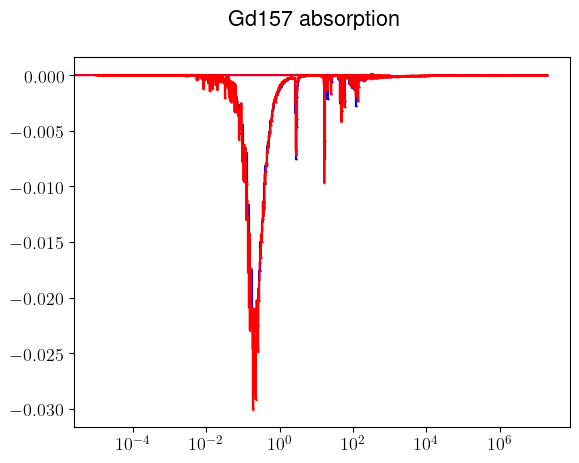

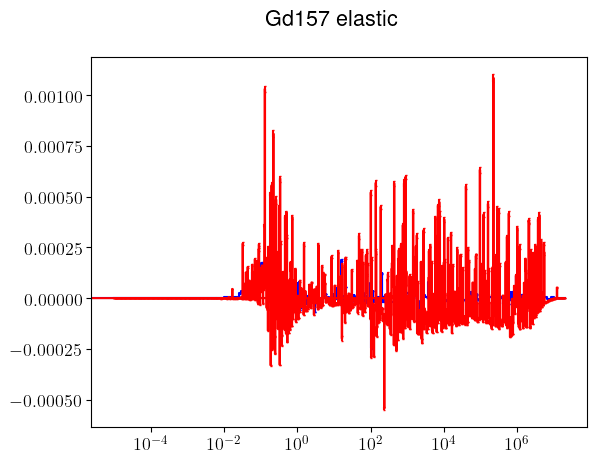

In [10]:
nucs = list(set(openmc_sens_dict.keys()))
nucs = ['Gd157']
for nuc in nucs:
    if nuc in tsunami_sens_dict:
        for reaction in openmc_sens_dict[nuc]['cross_section']:
            MT = RXN2MT[reaction]
            if MT not in tsunami_sens_dict[nuc].keys():
                continue
                
            fig = plt.figure()
            ax = fig.add_subplot(111)
            e_bins = openmc_sens_dict[nuc]['cross_section'][reaction]['energy']
            sens = openmc_sens_dict[nuc]['cross_section'][reaction]['mean']
            sens = sens/(np.log(e_bins[1:]) - np.log(e_bins[:-1]))
            # sens = sens/(e_bins[1:] - e_bins[:-1])
            sd = openmc_sens_dict[nuc]['cross_section'][reaction]['sd']
            
            plot_sens_err(ax, e_bins, sens, sd, color='b', label='openmc')
            
            e_bins = tsunami_sens_dict['E']
            sens = tsunami_sens_dict[nuc][MT][0]['mean'] # region 0 is over whole problem
            sens = sens/(np.log(e_bins[1:]) - np.log(e_bins[:-1]))
            sd = tsunami_sens_dict[nuc][MT][0]['sd'] # region 0 is over whole problem
            plot_sens_err(ax, e_bins, sens, sd, color='r', label='tsunami')
            
            ax.set_xscale('log')
            # ax.set_yscale('symlog')
            fig.suptitle(nuc + ' ' + reaction)
            plt.show()